# Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

# Clustering Stock Returns

Use clustering to identify clusters of stocks that have similar returns over time; an investor might select a diverse portfolio by selecting stocks from different clusters.



In [ ]:
df_nasdaq = pd.read_csv('https://raw.githubusercontent.com/shoond/portfolio/datasets/NasdaqReturns.csv')

print(df_nasdaq.dtypes)

df_nasdaq.head()

StockSymbol     object
Industry        object
SubIndustry     object
Ret2000.01     float64
Ret2000.02     float64
                ...   
Ret2009.08     float64
Ret2009.09     float64
Ret2009.10     float64
Ret2009.11     float64
Ret2009.12     float64
Length: 123, dtype: object


,StockSymbol,Industry,SubIndustry,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,...,Ret2009.03,Ret2009.04,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12
0,AAON,Industrial Goods,General Building Materials,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,...,0.185088,0.100565,0.067762,-0.045062,-0.025832,0.060976,-0.039234,-0.101297,0.041804,0.019885
1,AAPL,Consumer Goods,Electronic Equipment,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,...,0.192919,0.208858,0.079571,0.043673,0.138606,0.018159,0.103339,0.016995,0.053267,0.041980
2,ABAX,Healthcare,Diagnostic Substances,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,...,0.111541,-0.119907,0.162126,0.161108,0.304581,0.001883,0.014026,-0.141783,-0.024740,0.134043
3,ABCB,Financial,Regional,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,...,-0.024845,0.402570,-0.039816,-0.020155,0.004651,0.007812,0.122449,-0.170423,0.105351,0.062315
4,ABFS,Services,Trucking,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,...,0.113583,0.227007,0.216357,-0.075114,0.069471,0.112273,-0.052831,-0.127703,-0.047582,0.191981


# a

Let us start by exploring dataset.







##a_i

How many companies are in this dataset?
> 1158 companies represented by 'StockSymbol'

How many companies are there in each industry?

> Basic Materials       50

> Conglomerates          2

> Consumer Cyclical      2

> Consumer Goods        80

> Financial            338

> Healthcare           111

> Industrial Goods      65

> Services             202

> Technology           296

> Utilities             12

In [ ]:
# Number of unique companies (StockSymbols)
companies = df_nasdaq['StockSymbol'].unique()
print(len(companies))   # There are 1158 companies

1158


In [ ]:
# Number of industries
industry = df_nasdaq['Industry'].unique()
print(len(industry))    # There are 10 industries
print(industry)

10
['Industrial Goods' 'Consumer Goods' 'Healthcare' 'Financial' 'Services'
 'Technology' 'Basic Materials' 'Utilities' 'Conglomerates'
 'Consumer Cyclical']


In [ ]:
# Number of companies per industry, use groupby just like SQL
companies_by_industry = df_nasdaq.groupby('Industry')['StockSymbol'].size()

print(companies_by_industry)

Industry
Basic Materials       50
Conglomerates          2
Consumer Cyclical      2
Consumer Goods        80
Financial            338
Healthcare           111
Industrial Goods      65
Services             202
Technology           296
Utilities             12
Name: StockSymbol, dtype: int64


##a_ii

In December 2000, how many stocks in this dataset saw their value increase by 10% or more?
> 309 companies with 10% or more increase

Decrease by 10% or more?
> 261 companies with 10% or more decrease

In [ ]:
# Companies whose value increased by 10% or more in Dec 2000 (Ret2000.12).

gains = df_nasdaq[df_nasdaq['Ret2000.12'] >= 0.10]

print(gains['StockSymbol'].count()) #Count the number of companies

309


In [ ]:
# Companies whose value decreasd by 10% or more in Dec 2000 (Ret2002.12).

loss = df_nasdaq[df_nasdaq['Ret2000.12'] <= -0.10]

print(loss['StockSymbol'].count())

261


## a_iii

In October 2008, which industries had the worst average return across all stocks in that industry?
> Conglomerates had the worst average return at -26.57%

In [ ]:
# Slice dataframe to only get 'Ret2008.10' data.
df_2008_10 = df_nasdaq[['StockSymbol', 'Industry', 'Ret2008.10']]

#Groupby industry and 'Ret2008.10' get mean.
df_2008_10.groupby('Industry')['Ret2008.10'].mean()


Industry
Basic Materials     -0.254674
Conglomerates       -0.265748
Consumer Cyclical   -0.145705
Consumer Goods      -0.155209
Financial           -0.102884
Healthcare          -0.169440
Industrial Goods    -0.233366
Services            -0.173833
Technology          -0.196299
Utilities           -0.120087
Name: Ret2008.10, dtype: float64

# b

Now lets cluster stocks by monthly returns.

Cluster observations based on variables Ret2000.01 to Ret2009.12.

Do not use variables (StockSymbol, Industry or SubIndustry)

Do so by creating a new dataset containing only these variables or can just plug them into clustering algorithm.


In [ ]:
# Omit the first three columns, to create new dataset
# .iloc[rows, columns]
df_cluster = df_nasdaq.iloc[:, 3:]
df_cluster.head()

,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,Ret2000.08,Ret2000.09,Ret2000.10,...,Ret2009.03,Ret2009.04,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12
0,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,0.024676,-0.020408,-0.173318,...,0.185088,0.100565,0.067762,-0.045062,-0.025832,0.060976,-0.039234,-0.101297,0.041804,0.019885
1,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,0.211290,-0.580003,-0.267141,...,0.192919,0.208858,0.079571,0.043673,0.138606,0.018159,0.103339,0.016995,0.053267,0.041980
2,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,0.033392,0.000000,0.091696,...,0.111541,-0.119907,0.162126,0.161108,0.304581,0.001883,0.014026,-0.141783,-0.024740,0.134043
3,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,0.095290,0.056680,-0.096339,...,-0.024845,0.402570,-0.039816,-0.020155,0.004651,0.007812,0.122449,-0.170423,0.105351,0.062315
4,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,0.056842,0.033602,0.036269,...,0.113583,0.227007,0.216357,-0.075114,0.069471,0.112273,-0.052831,-0.127703,-0.047582,0.191981


## b_i

In this analysis, we will not normalize our data prior to clustering.

Why is this the valid approach?
> Our goal is to identify the variance in stock returns, normalization suppress variance in data, thus we want to keep it un-normalized.

## b_ii

Cluster the data using Hierarchical clustering. Clearly indicate which distance metrics you used for point distances and cluster distances.

Plot the resulting dendogram.

What do you think are reasonable choices for number of clusters to select, based on the dendrogram?
> From dendrogram we see adequate separation of nodes while still being able to distinguish the nodes starting at 10 clusters.


How about for the application?
> For the application, Ive reduced the number of clusters to 5. Ive found empirically that using more than 5 clusters starts to create unnecessary clusterings with only 1-2 companies in each one with no distinguishable characteristics.



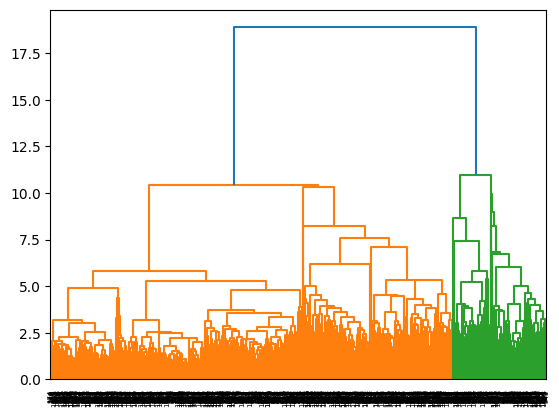

In [ ]:
Z = linkage(df_cluster, method = 'ward', metric = 'euclidean')

dendrogram(Z)

plt.show()

In [ ]:
# From dendrogram we see adequate separation of nodes while still being able to distinguish the nodes at 5 clusters.
num_clusters = 5

clusters = cut_tree(Z, n_clusters = num_clusters).flatten()

df_nasdaq['clusters'] = clusters

df_nasdaq.head()

,StockSymbol,Industry,SubIndustry,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,...,Ret2009.04,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12,clusters
0,AAON,Industrial Goods,General Building Materials,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,...,0.100565,0.067762,-0.045062,-0.025832,0.060976,-0.039234,-0.101297,0.041804,0.019885,0
1,AAPL,Consumer Goods,Electronic Equipment,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,...,0.208858,0.079571,0.043673,0.138606,0.018159,0.103339,0.016995,0.053267,0.041980,1
2,ABAX,Healthcare,Diagnostic Substances,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,...,-0.119907,0.162126,0.161108,0.304581,0.001883,0.014026,-0.141783,-0.024740,0.134043,2
3,ABCB,Financial,Regional,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,...,0.402570,-0.039816,-0.020155,0.004651,0.007812,0.122449,-0.170423,0.105351,0.062315,0
4,ABFS,Services,Trucking,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,...,0.227007,0.216357,-0.075114,0.069471,0.112273,-0.052831,-0.127703,-0.047582,0.191981,0


## b_iii

Extract cluster assignments from your hierarchical clustering model, using the number of clusters you selected.

Describe each cluster, using the number of observations in the cluster, the industry of the companies in the cluster, and the subindustry of the companies in the cluster.
> See cells below

In [ ]:
# Number of observations in each cluster
df_nasdaq.groupby('clusters')['Industry'].count()

clusters
0    588
1    131
2    350
3     88
4      1
Name: Industry, dtype: int64

In [ ]:
# Slice into respective clusters
cluster_0 = df_nasdaq[df_nasdaq['clusters'] == 0]
cluster_1 = df_nasdaq[df_nasdaq['clusters'] == 1]
cluster_2 = df_nasdaq[df_nasdaq['clusters'] == 2]
cluster_3 = df_nasdaq[df_nasdaq['clusters'] == 3]
cluster_4 = df_nasdaq[df_nasdaq['clusters'] == 4]

In [ ]:
# Original dataset for reference.
df_nasdaq.groupby('Industry')['clusters'].count()

Industry
Basic Materials       50
Conglomerates          2
Consumer Cyclical      2
Consumer Goods        80
Financial            338
Healthcare           111
Industrial Goods      65
Services             202
Technology           296
Utilities             12
Name: clusters, dtype: int64

cluster_0

In [ ]:
# Industry count by first cluster.
cluster_0.groupby('Industry')['clusters'].count()

# Finance and Services heavy

Industry
Basic Materials       17
Conglomerates          2
Consumer Cyclical      2
Consumer Goods        54
Financial            299
Healthcare            29
Industrial Goods      23
Services             113
Technology            38
Utilities             11
Name: clusters, dtype: int64

In [ ]:
# SubIndustry count by first cluster, sort to show most prominent
cluster_0.groupby('SubIndustry')['clusters'].count().sort_values(ascending=False)

SubIndustry
Regional                          196
Savings & Loans                    51
Property & Casualty Insurance      16
Restaurants                        11
Trucking                           11
                                 ... 
Movie Production, Theaters          1
Oil & Gas Equipment & Services      1
Oil & Gas Pipelines                 1
Paper & Paper Products              1
Wireless Communications             1
Name: clusters, Length: 125, dtype: int64

cluster_1

In [ ]:
#Industry count by 2nd cluster
cluster_1.groupby('Industry')['clusters'].count()

# Technology heavy cluster

Industry
Basic Materials       2
Consumer Goods        1
Financial             5
Healthcare            5
Industrial Goods      3
Services             11
Technology          104
Name: clusters, dtype: int64

In [ ]:
#SubIndustry count by 2nd cluster, show most prominent
cluster_1.groupby('SubIndustry')['clusters'].count().sort_values(ascending=False)

SubIndustry
Semiconductor                          33
Semiconductor Equipment & Materials    14
Business Software & Services            8
Communication Equipment                 8
Scientific & Technical Instruments      7
Computer Peripherals                    7
Application Software                    6
Semiconductor- Memory Chips             4
Investment Brokerage                    3
Diversified Electronics                 2
Medical Appliances & Equipment          2
Security Software & Services            2
Specialty Retail, Other                 2
Data Storage Devices                    2
Technical & System Software             2
Computer Based Systems                  2
CATV Systems                            2
Business Services                       2
Networking & Communication Devices      2
Money Center Banks                      1
Steel & Iron                            1
Waste Management                        1
Research Services                       1
Printed Circuit Boards

cluster_2

In [ ]:
#Industry count by 3rd cluster
cluster_2.groupby('Industry')['clusters'].count()

# Technology heavy, + some diversification

Industry
Basic Materials      31
Consumer Goods       24
Financial            34
Healthcare           49
Industrial Goods     37
Services             73
Technology          101
Utilities             1
Name: clusters, dtype: int64

In [ ]:
#SubIndustry count by 3rd cluster, show most prominent
cluster_2.groupby('SubIndustry')['clusters'].count().sort_values(ascending=False)

SubIndustry
Application Software                  16
Independent Oil & Gas                 13
Biotechnology                         13
Scientific & Technical Instruments    12
Business Services                     11
                                      ..
Medical Equipment Wholesale            1
Medical Practitioners                  1
Movie Production, Theaters             1
Music & Video Stores                   1
Life Insurance                         1
Name: clusters, Length: 106, dtype: int64

cluster_3

In [ ]:
#Industry count by 4th cluster
cluster_3.groupby('Industry')['clusters'].count()

# Healthcare and technology cluster

Industry
Consumer Goods       1
Healthcare          28
Industrial Goods     1
Services             5
Technology          53
Name: clusters, dtype: int64

In [ ]:
#SubIndustry count by 4th cluster, show most prominent
cluster_3.groupby('SubIndustry')['clusters'].count().sort_values(ascending=False)

SubIndustry
Biotechnology                          17
Application Software                    6
Communication Equipment                 6
Networking & Communication Devices      5
Semiconductor Equipment & Materials     5
Semiconductor                           5
Medical Instruments & Supplies          4
Diversified Electronics                 3
Multimedia & Graphics Software          3
Internet Software & Services            3
Computer Peripherals                    2
Data Storage Devices                    2
Drug Manufacturers                      2
Research Services                       2
Business Software & Services            2
Semiconductor- Memory Chips             1
Technical & System Software             1
Security Software & Services            1
Scientific & Technical Instruments      1
Processing Systems & Products           1
Printed Circuit Boards                  1
Medical Laboratories & Research         1
Information Technology Services         1
Medical Appliances & E

cluster_4

In [ ]:
cluster_4.groupby('Industry')['clusters'].count()

cluster_4
# Outlier/remainder

,StockSymbol,Industry,SubIndustry,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,...,Ret2009.04,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12,clusters
502,IDSA,Industrial Goods,Waste Management,0.166667,0.213592,0.333333,-0.333333,-0.11,-0.157303,-0.126667,...,0.002004,0.029412,0.306641,0.09375,0.039402,0.138158,0.077193,0.057235,-0.041206,4


## b_iv

We expect there to be significant differences between the returns of stocks in different clusters.

For February 2000, do some clusters have negative average returns while other clusters have positive average returns?

> The 1st cluster had -2.36% return for the month

> The 2nd cluster had +19.71% return for the month

> The 3rd cluster had +11.37% return for the month

> The 4th cluster had +103.81% return for the month

> The 5th cluster had +21.36% return for the month

How about for March 2000?

> The 1st cluster had +1.14 return for the month

> The 2nd cluster had -5.20% return for the month

> The 3rd cluster had -0.34% return for the month

> The 4th cluster had -25.93% return for the month

> The 5th cluster had +33.33% return for the month

In [ ]:
# Slice 'Ret2000.02' then groupby.mean() to get average return for each cluster.

feb_2000 = df_nasdaq[['Ret2000.02', 'clusters']]

feb_2000.groupby('clusters')['Ret2000.02'].mean()

clusters
0   -0.023660
1    0.197151
2    0.113708
3    1.038105
4    0.213592
Name: Ret2000.02, dtype: float64

In [ ]:
# Slice 'Ret2000.03' then groupby.mean() to get average return for each cluster.

mar_2000 = df_nasdaq[['Ret2000.03', 'clusters']]

mar_2000.groupby('clusters')['Ret2000.03'].mean()

clusters
0    0.011428
1   -0.052053
2   -0.003415
3   -0.259350
4    0.333333
Name: Ret2000.03, dtype: float64

In [ ]:
print('Average returns of lifetime of stocks within each hierarchical cluster')
print((cluster_0.iloc[:,3:-1].mean(axis=1)).mean())
print((cluster_1.iloc[:,3:-1].mean(axis=1)).mean())
print((cluster_2.iloc[:,3:-1].mean(axis=1)).mean())
print((cluster_3.iloc[:,3:-1].mean(axis=1)).mean())
print((cluster_4.iloc[:,3:-1].mean(axis=1)).mean())

#cluster_4 has the best return at 7.93%

Average returns of lifetime of stocks within each hierarchical cluster
0.006143887716354875
0.010419559001717558
0.015344571379785715
0.016295135261458333
0.07935574077500002


## b_v

Now run the K-means clustering algorithm on this data. You should select the same number of clusters you used for hierarchical clustering.

Extract cluster assignments from your K-means clustering model, and compare to hierarchical clustering.

Are the clusters similar or different?
> There some general similarities such as both hierarchical and k-means clustering resulting in Finance, Technology, Healthcare+Technology, or Diversified clusters for both models. The differences are in the counts of each industry amongst clusters. For example, when comapring cluster_0 and k_cluster_0 they are both weighted in the Finance and Services industries, however k_cluster_0 selected a few more Finance companies and omitted some Services companies.

> It should noted however, k-means clustering results in higher average returns in 4/5 clusters compared to hierarchical clustering.

In [ ]:
#KMeans clustering

K = df_cluster

kmeans = KMeans(n_clusters = num_clusters, random_state=42)

kmeans.fit(K)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
k_clusters = kmeans.fit_predict(K)
df_nasdaq['k_clusters'] = k_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Slice into respective k_clusters
k_cluster_0 = df_nasdaq[df_nasdaq['k_clusters'] == 0]
k_cluster_1 = df_nasdaq[df_nasdaq['k_clusters'] == 1]
k_cluster_2 = df_nasdaq[df_nasdaq['k_clusters'] == 2]
k_cluster_3 = df_nasdaq[df_nasdaq['k_clusters'] == 3]
k_cluster_4 = df_nasdaq[df_nasdaq['k_clusters'] == 4]

In [ ]:
k_cluster_0.groupby('Industry')['clusters'].count()

#Finance heavy

Industry
Basic Materials       11
Consumer Cyclical      1
Consumer Goods        37
Financial            303
Healthcare            31
Industrial Goods      18
Services              97
Technology            32
Utilities             10
Name: clusters, dtype: int64

In [ ]:
k_cluster_1.groupby('Industry')['clusters'].count()

# Remaining/outlier cluster

Industry
Healthcare    1
Services      1
Name: clusters, dtype: int64

In [ ]:
k_cluster_2.groupby('Industry')['clusters'].count()

#Mix of Healthcare and Technology

Industry
Healthcare          24
Industrial Goods     2
Services             3
Technology          34
Utilities            1
Name: clusters, dtype: int64

In [ ]:
k_cluster_3.groupby('Industry')['clusters'].count()

# Diversified cluster

Industry
Basic Materials      38
Conglomerates         2
Consumer Cyclical     1
Consumer Goods       40
Financial            27
Healthcare           37
Industrial Goods     39
Services             81
Technology           68
Utilities             1
Name: clusters, dtype: int64

In [ ]:
k_cluster_4.groupby('Industry')['clusters'].count()

#Technology heavy cluster

Industry
Basic Materials       1
Consumer Goods        3
Financial             8
Healthcare           18
Industrial Goods      6
Services             20
Technology          162
Name: clusters, dtype: int64

In [ ]:
print('Average returns of lifetime of stocks within each k-means cluster')
print((k_cluster_0.iloc[:,3:-1].mean(axis=1)).mean())
print((k_cluster_1.iloc[:,3:-1].mean(axis=1)).mean())
print((k_cluster_2.iloc[:,3:-1].mean(axis=1)).mean())
print((k_cluster_3.iloc[:,3:-1].mean(axis=1)).mean())
print((k_cluster_4.iloc[:,3:-1].mean(axis=1)).mean())

#k_cluster_1 has the best return at 6.62%

Average returns of lifetime of stocks within each k-means cluster
0.006748396987725742
0.06620350109917353
0.04304061153254132
0.02839811982741129
0.022155958871825004


In [ ]:
k_cluster_1

,StockSymbol,Industry,SubIndustry,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,...,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12,clusters,k_clusters
316,DYII,Healthcare,Hospitals,-0.563559,0.063107,3.363208,-0.027027,-0.230425,0.088483,-0.052903,...,0.051429,-0.144022,0.027778,0.055556,-0.028986,-0.069364,0.171875,-0.090667,2,1
636,MDCA,Services,Marketing Services,0.165517,0.401198,4.008621,-0.214286,0.027778,-0.047568,-0.048808,...,0.309353,-0.012545,0.237750,-0.119708,0.229752,0.086667,-0.001214,0.001200,2,1


# c

Propose a diverse portfolio of stocks using the results of your clusters.

How do you think you can use both Hierarchical and K-Means clustering to acheive the best outcome?
> Let us assume US annual inflation rate is 4% so we want to find stocks that performed > 0.04 for the lifetime of this dataset (df_nasdaq_pos_roi).

> We see that there were only 217 out of 1355 Nasdaq companies that beat inflation thus providing overall profit.

> Only 7 out 10 industries presented overall profit,
* 'Healthcare', 'Basic Materials', 'Technology', 'Services', 'Industrial Goods', 'Financial', 'Consumer Goods'

> Hierarchical cluster_4 containing just "ISDA" an Industrial Goods stock returned 7.93% overall.

> K-means k_cluster_1 containing just "DYII" and "MDCA", Healthcare and Services industry stocks returned 6.62% overall.

> To further diversify out portfolio I would recommend picking stocks from the df_nasdaq_pos_roi dataset and from industries not represented above by "ISDA, DYII, and MDCA"


In [ ]:
#Calcuate average return over lifetime of stock. Append to original df_nasdaq

avg_return_lifetime = df_cluster.mean(axis=1)

df_nasdaq['avg_return_lifetime'] = avg_return_lifetime

In [ ]:
# Lets assume US annual inflation rate is 4%
#Find stocks whose returns were postive or negative/no gains
df_nasdaq_pos_roi = df_nasdaq[df_nasdaq['avg_return_lifetime'] > 0.04]
df_nasdaq_neg_roi = df_nasdaq[df_nasdaq['avg_return_lifetime'] <= 0.04]

In [ ]:
print(df_nasdaq_pos_roi.count())
print(df_nasdaq_neg_roi.count())

StockSymbol            20
Industry               20
SubIndustry            20
Ret2000.01             20
Ret2000.02             20
                       ..
Ret2009.11             20
Ret2009.12             20
clusters               20
k_clusters             20
avg_return_lifetime    20
Length: 126, dtype: int64
StockSymbol            1138
Industry               1138
SubIndustry            1138
Ret2000.01             1138
Ret2000.02             1138
                       ... 
Ret2009.11             1138
Ret2009.12             1138
clusters               1138
k_clusters             1138
avg_return_lifetime    1138
Length: 126, dtype: int64


In [ ]:
df_nasdaq_pos_roi['Industry'].unique()

array(['Healthcare', 'Industrial Goods', 'Technology', 'Consumer Goods',
       'Basic Materials', 'Services'], dtype=object)